<a href="https://www.kaggle.com/code/eduardoyanez/is-it-a-car?scriptVersionId=125039758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install -Uqq fastai duckduckgo_search

In [2]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
from urllib.error import HTTPError

In [3]:
def search_images(search_term, max_images=30):
    print(f"\nSearching for '{search_term}'")
    return L(ddg_images(search_term, max_results=max_images)).itemgot('image')

In [4]:
def predict_search(search_term):
    search_urls = search_images(search_term, max_images=5)
    filename = 'searched_image.jpg'
    for i in range(5):
        try:
            download_url(search_urls[i], filename, show_progress=False)
            is_car,_,probs = learner.predict(filename)
            print(f"This is a: {is_car}.")
            print(f"Probability it is a car: {probs[0]:.4f}")
            break
        except HTTPError:
            if i == 4:
                printf("Cannot find any images for this search term")
            else:
                print(f"Image {search_urls[i]} not found, trying next...")

In [5]:
search_terms = 'motorbike', 'car'
path = Path('car_or_not')

for search_term in search_terms:
    dest = (path/search_term)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'regular {search_term}'))
    download_images(dest, urls=search_images(f'sport {search_term}'))
    download_images(dest, urls=search_images(f'classic {search_term}'))
    resize_images(path/search_term, max_size=400, dest=path/search_term)


Searching for 'regular motorbike'

Searching for 'sport motorbike'

Searching for 'classic motorbike'

Searching for 'regular car'

Searching for 'sport car'

Searching for 'classic car'


In [6]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

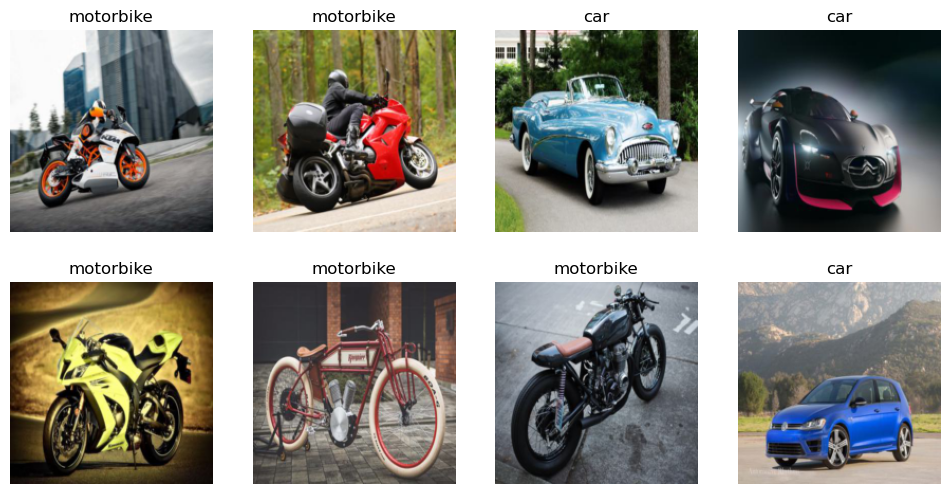

In [7]:
dataloaders = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=43),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dataloaders.show_batch(max_n=8)

In [8]:
learner = vision_learner(dataloaders, resnet18, metrics=error_rate)
learner.fine_tune(3)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.048540,0.155894,0.030303,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.059942,0.096801,0.030303,00:01
1,0.039873,0.055684,0.030303,00:01
2,0.027618,0.035016,0.030303,00:01


In [9]:
predict_search('volvo xc40')
predict_search('seat ibiza')
predict_search('honda cb650f')
predict_search('honda africa twin')
predict_search('citroen xara picasso')



Searching for 'volvo xc40'


This is a: car.
Probability it is a car: 1.0000

Searching for 'seat ibiza'


This is a: car.
Probability it is a car: 1.0000

Searching for 'honda cb650f'
Image https://i1.wp.com/www.asphaltandrubber.com/wp-content/uploads/2017/05/2018-Honda-CB650F.jpg?ssl=1 not found, trying next...


This is a: motorbike.
Probability it is a car: 0.0000

Searching for 'honda africa twin'


This is a: motorbike.
Probability it is a car: 0.0000

Searching for 'citroen xara picasso'


This is a: car.
Probability it is a car: 1.0000
